Before go to further analysis, I would like to leave some comments on dataset:
- day: last contact day of the week (categorical: 'mon', 'tue' ...)
  but in the dataset, it's a numeric column with the range from 1-31
- pdays: 999 means client was not previously contacted 
  but in the dataset, I guess -1 means client was not previously contacted
- poutcome: categorical 'failure', 'nonexistent', 'success'
  but in the dataset, we have 'unknown'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_bank = pd.read_csv('bank.csv')

In [3]:
df_bank.shape

(11162, 17)

In [4]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
# a function to bins numerical variables
def createList(r1, r2, interval): 
    return np.arange(r1, r2, interval) 

# I. DATA EXPLORATORY ANALYSIS

## 1. Check for missing values

If we define "unknown" is not missing values, the dataset has no missing value 

In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## 2. Mean of values and spread

### 2.1 Numerical columns

In [7]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### 2.2 Categorical columns

In [8]:
df_bank.describe(include ='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


## 3. Categorical columns exploration 

In [9]:
# get list of columns 
cols = df_bank.columns
# get list of numerical columns 
num_cols = df_bank._get_numeric_data().columns
# get list of categorical columns
cat_cols = list(set(cols) - set(num_cols))

### 3.1 Unique value count 

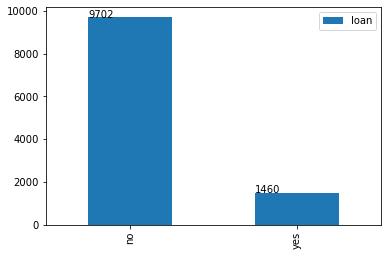

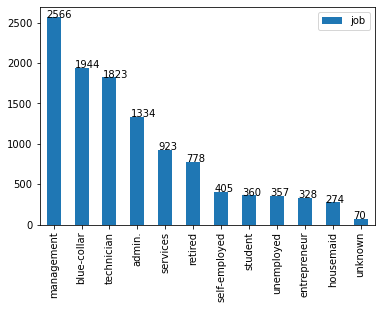

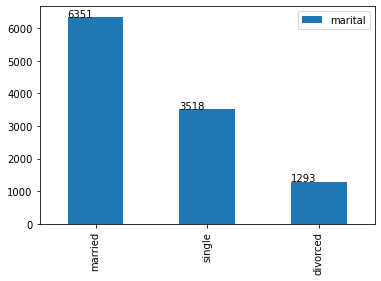

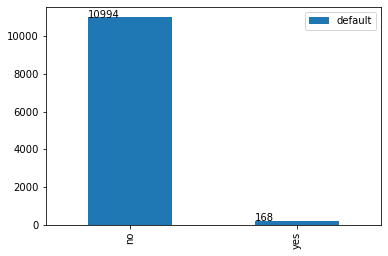

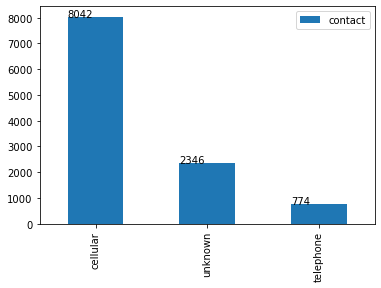

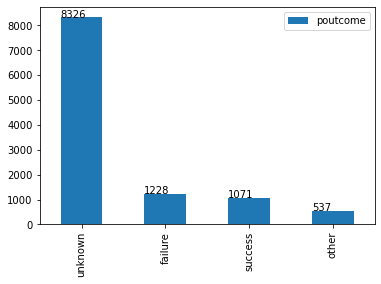

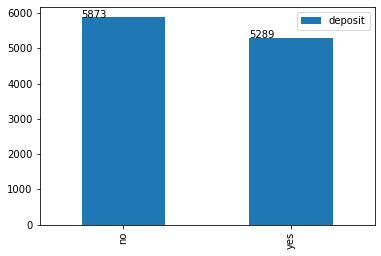

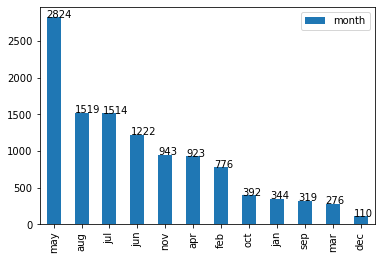

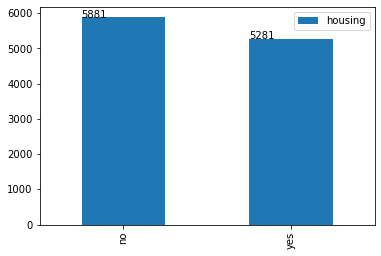

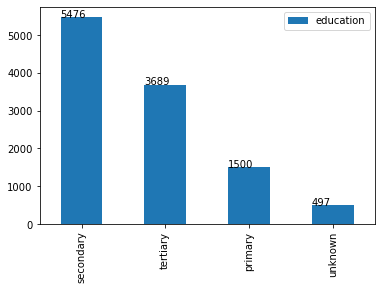

In [10]:
for item in cat_cols:
    df_count = pd.DataFrame(df_bank[item].value_counts())
    ax = df_count.plot.bar()
    for p in ax.patches:
        ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))         
    plt.show()

### 3.2 Cramer-V correlation between all Categorical columns

## 4. Numerical columns exploration 

### 4.1 Histogram

age


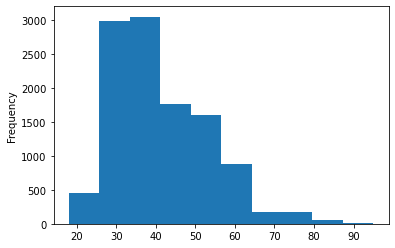

balance


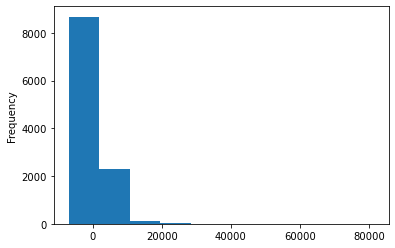

day


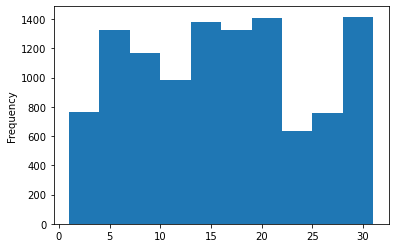

duration


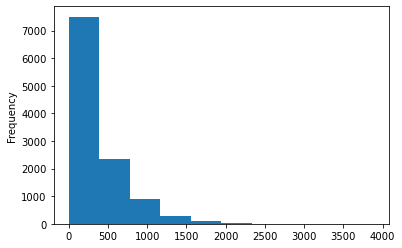

campaign


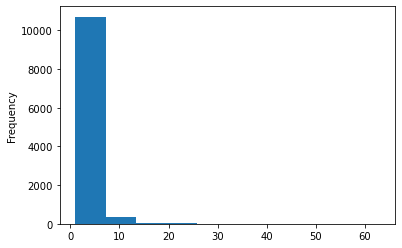

pdays


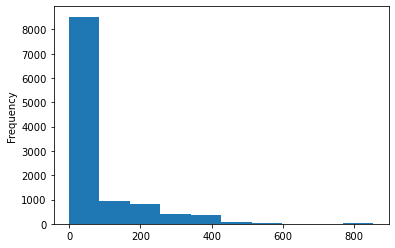

previous


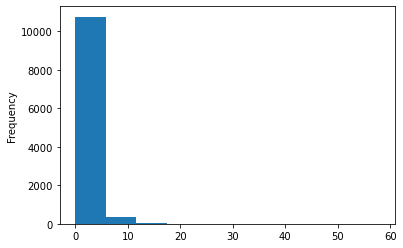

In [11]:
for item in num_cols:
    print(item)
    df_bank[item].plot.hist()
    plt.show()

### 4.2 Correlation Heat-map between all numeric columns

In [12]:
corr = df_bank[num_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


### 4.3 Outliers 

age


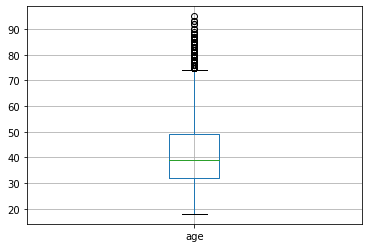

balance


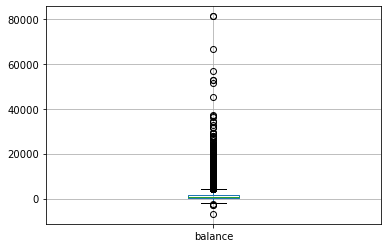

day


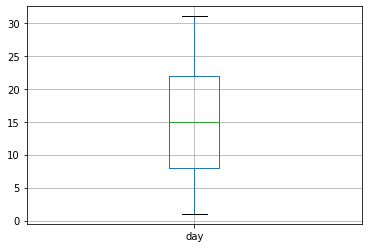

duration


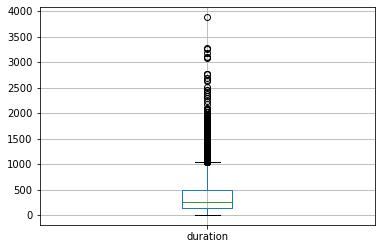

campaign


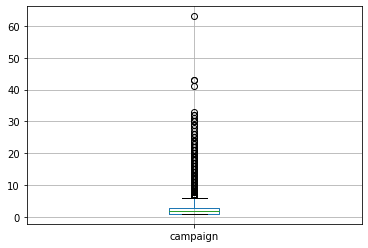

pdays


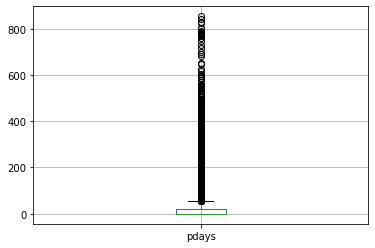

previous


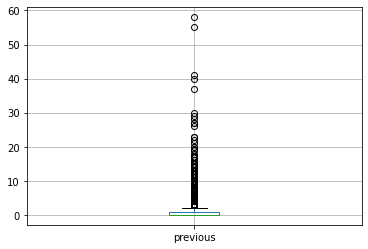

In [13]:
for item in num_cols:
    print(item)
    df_bank.boxplot(column = [item])
    plt.show()

# II. VISUALIZATION

## 1. How many customers opened the Term Deposit? How many did not? Check y column and plot

There are 5289 customes opened the term deposit and 5873 ones who did not

In [14]:
pd.value_counts(df_bank['deposit'])

no     5873
yes    5289
Name: deposit, dtype: int64

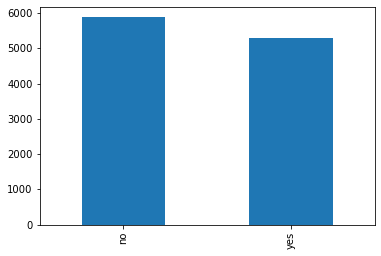

In [15]:
pd.value_counts(df_bank['deposit']).plot.bar()

## 2. Plot the spread for the people who opened and did not open the term deposit 

### 2.1 education spread against y 

In [16]:
# df_bank.groupby(['education', 'deposit']).agg({'deposit': 'count'}).groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2))

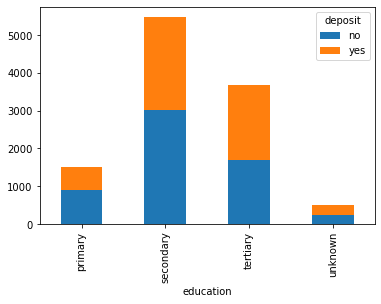

In [17]:
df_bank.groupby(['education', 'deposit']).size().unstack().plot(kind='bar', stacked=True)

### 2.2 age spread against y

In [18]:
age_min = 0
age_max = 100
age_interval = 20

age_bins = createList(age_min, age_max, age_interval)
df_bank['age_group'] = pd.cut(df_bank['age'], bins = age_bins)
df_bank['age_group'].head()

0    (40, 60]
1    (40, 60]
2    (40, 60]
3    (40, 60]
4    (40, 60]
Name: age_group, dtype: category
Categories (4, interval[int64]): [(0, 20] < (20, 40] < (40, 60] < (60, 80]]

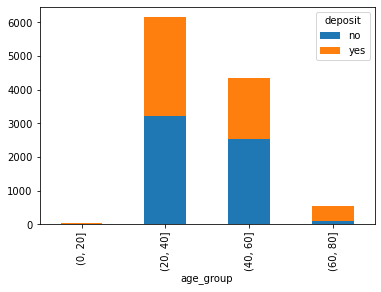

In [19]:
df_bank.groupby(['age_group', 'deposit']).size().unstack().plot(kind='bar', stacked=True)

In [20]:
# df_bank.groupby(['age_group', 'deposit']).agg({'deposit': 'count'}).groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2))

### 2.3 marital spread against y

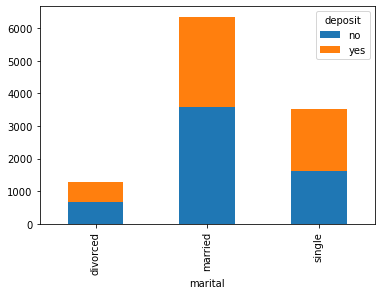

In [21]:
df_bank.groupby(['marital', 'deposit']).size().unstack().plot(kind='bar', stacked=True)

### 2.4 balance spread against y

In [22]:
df_bank['balance'].max()

81204

In [23]:
balance_min = 0
balance_max = 10000
balance_interval = 1000

balance_bins = createList(balance_min, balance_max, balance_interval)
df_bank['balance_group'] = pd.cut(df_bank['balance'], bins = balance_bins)
df_bank['balance_group'].head()

0    (2000, 3000]
1       (0, 1000]
2    (1000, 2000]
3    (2000, 3000]
4       (0, 1000]
Name: balance_group, dtype: category
Categories (9, interval[int64]): [(0, 1000] < (1000, 2000] < (2000, 3000] < (3000, 4000] ... (5000, 6000] < (6000, 7000] < (7000, 8000] < (8000, 9000]]

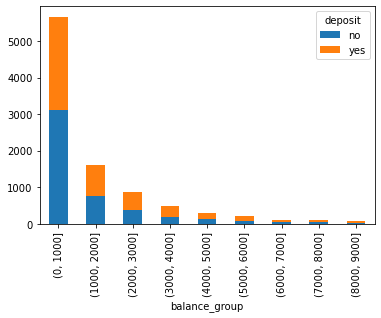

In [24]:
df_bank.groupby(['balance_group', 'deposit']).size().unstack().plot(kind='bar', stacked=True)

### 2.5 the number of the campaign spread against y

In [25]:
df_bank['campaign'].max()

63

In [26]:
campaign_min = 0
campaign_max = 10
campaign_interval = 2

campaign_bins = createList(campaign_min, campaign_max, campaign_interval)
df_bank['campaign_group'] = pd.cut(df_bank['campaign'], bins = campaign_bins)
df_bank['campaign_group'].head()

0    (0, 2]
1    (0, 2]
2    (0, 2]
3    (0, 2]
4    (0, 2]
Name: campaign_group, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 4] < (4, 6] < (6, 8]]

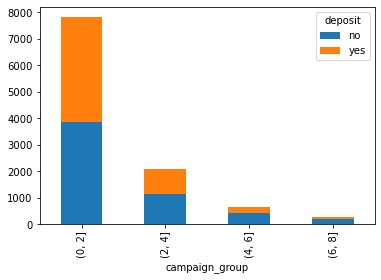

In [27]:
df_bank.groupby(['campaign_group', 'deposit']).size().unstack().plot(kind='bar', stacked=True)

### 2.6 contact types spread against y

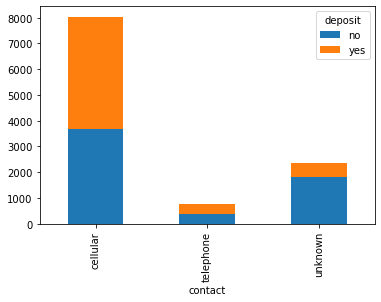

In [28]:
df_bank.groupby(['contact', 'deposit']).size().unstack().plot(kind='bar', stacked=True)

In [29]:
df_bank.groupby(['contact']).size()

contact
cellular     8042
telephone     774
unknown      2346
dtype: int64

### 2.7 last contact month of the year against y

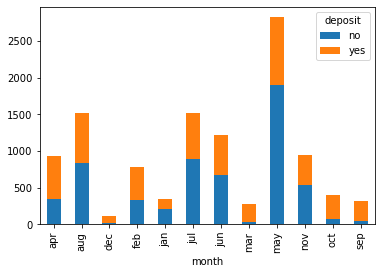

In [30]:
df_bank.groupby(['month', 'deposit']).size().unstack().plot(kind='bar', stacked=True)

### 2.8 day last contacted spread against y

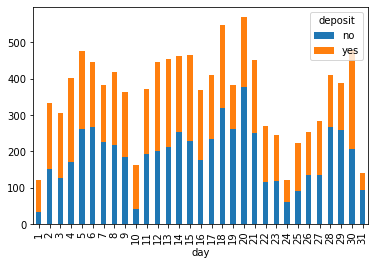

In [31]:
df_bank.groupby(['day', 'deposit']).size().unstack().plot(kind='bar', stacked=True)

### 2.9 duration of the last contact spread against y

In [32]:
df_bank['duration'].max()

3881

In [33]:
duration_min = 0
duration_max = 2200
duration_interval = 120

duration_bins = createList(duration_min, duration_max, duration_interval)
df_bank['duration_group'] = pd.cut(df_bank['duration'], bins = duration_bins)
df_bank['duration_group'].head()

0     (960, 1080]
1    (1440, 1560]
2    (1320, 1440]
3      (480, 600]
4      (600, 720]
Name: duration_group, dtype: category
Categories (18, interval[int64]): [(0, 120] < (120, 240] < (240, 360] < (360, 480] ... (1680, 1800] < (1800, 1920] < (1920, 2040] < (2040, 2160]]

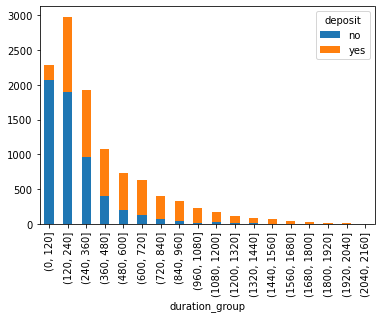

In [34]:
df_bank.groupby(['duration_group', 'deposit']).size().unstack().plot(kind='bar', stacked=True)

### 2.10 pdays spread against y

In [35]:
df_bank['pdays'] = df_bank['pdays'].replace(-1, 999)

In [36]:
pdays_min = 0
pdays_max = df_bank['pdays'].max() + 28
pdays_interval = 28

pdays_bins = createList(pdays_min, pdays_max, pdays_interval)
df_bank['pdays_group'] = pd.cut(df_bank['pdays'], bins = pdays_bins)
df_bank['pdays_group'].head()

0    (980, 1008]
1    (980, 1008]
2    (980, 1008]
3    (980, 1008]
4    (980, 1008]
Name: pdays_group, dtype: category
Categories (36, interval[int64]): [(0, 28] < (28, 56] < (56, 84] < (84, 112] ... (896, 924] < (924, 952] < (952, 980] < (980, 1008]]

In [37]:
#df_bank['pdays'].value_counts()

In [38]:
#df_bank[['pdays','pdays_group']].head()

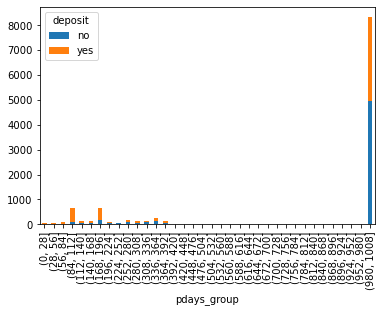

In [39]:
df_bank.groupby(['pdays_group', 'deposit']).size().unstack().plot(kind='bar', stacked=True)

### 2.11 previous spread against y

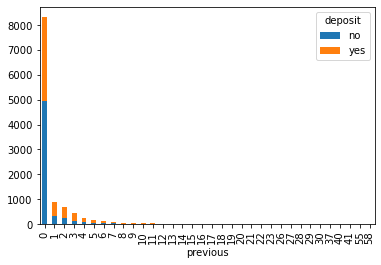

In [40]:
df_bank.groupby(['previous', 'deposit']).size().unstack().plot(kind='bar', stacked=True)

# III. INSIGHT

## 1. People with background (age, education, job, material ...) are most likely to get a Term Deposit (y=yes)

According to the charts in visualization, people with following background are most likely to get a Term Deposit:  
- people with education tertiary (54 % people with education tertiary get a term deposit, and this number for primary & secondary is 39% & 44%)
- people from 60-80 year old (82% people from 60-80 get a term deposit, this number for 20-40 & 40-60 is 47% & 42%)

## 2. What are the 5 most important features for predicting whether a client will get a Term Deposit (y=yes) or not?

I will use 3 feature selection techniques to determine most important features
- Univariate Selection
- Feature Importance
- Correlation Matrix with Heatmap

As the result of 3 methods, the 5 most important features should be:
- duration  
- balance  
- pdays   
- previous    
- contact    

Because they have the highest score in 2 methods (Univariate Selection, Correlation Matrix) 

The detail is presented below

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns

df_bank_feature_select = pd.read_csv('bank.csv')

# tranform category to number
le = preprocessing.LabelEncoder()
for i in range(len(df_bank_feature_select.columns)):
    df_bank_feature_select.iloc[:,i] = le.fit_transform(df_bank_feature_select.iloc[:,i])

independent_list = df_bank_feature_select.columns.drop('deposit')
X = df_bank_feature_select[independent_list]  #independent columns
y = df_bank_feature_select['deposit']     #target column i.e price range

### 2.1 Univariate Selection

In [42]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

     Feature          Score
11  duration  677934.818140
5    balance  159315.360320
13     pdays   47345.535965
14  previous    1371.775339
8    contact     953.667451


### 2.2 Feature Importance

[0.07598061 0.0500013  0.02906589 0.03449946 0.00302989 0.0747117
 0.03875283 0.01652357 0.05431258 0.0741225  0.0882714  0.30854981
 0.05091891 0.0334407  0.01965516 0.04816368]


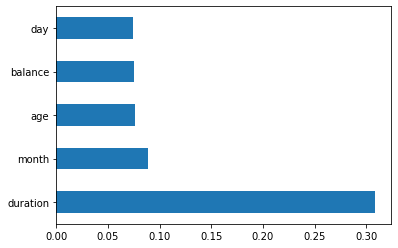

In [43]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### 2.3 Correlation Matrix with Heatmap

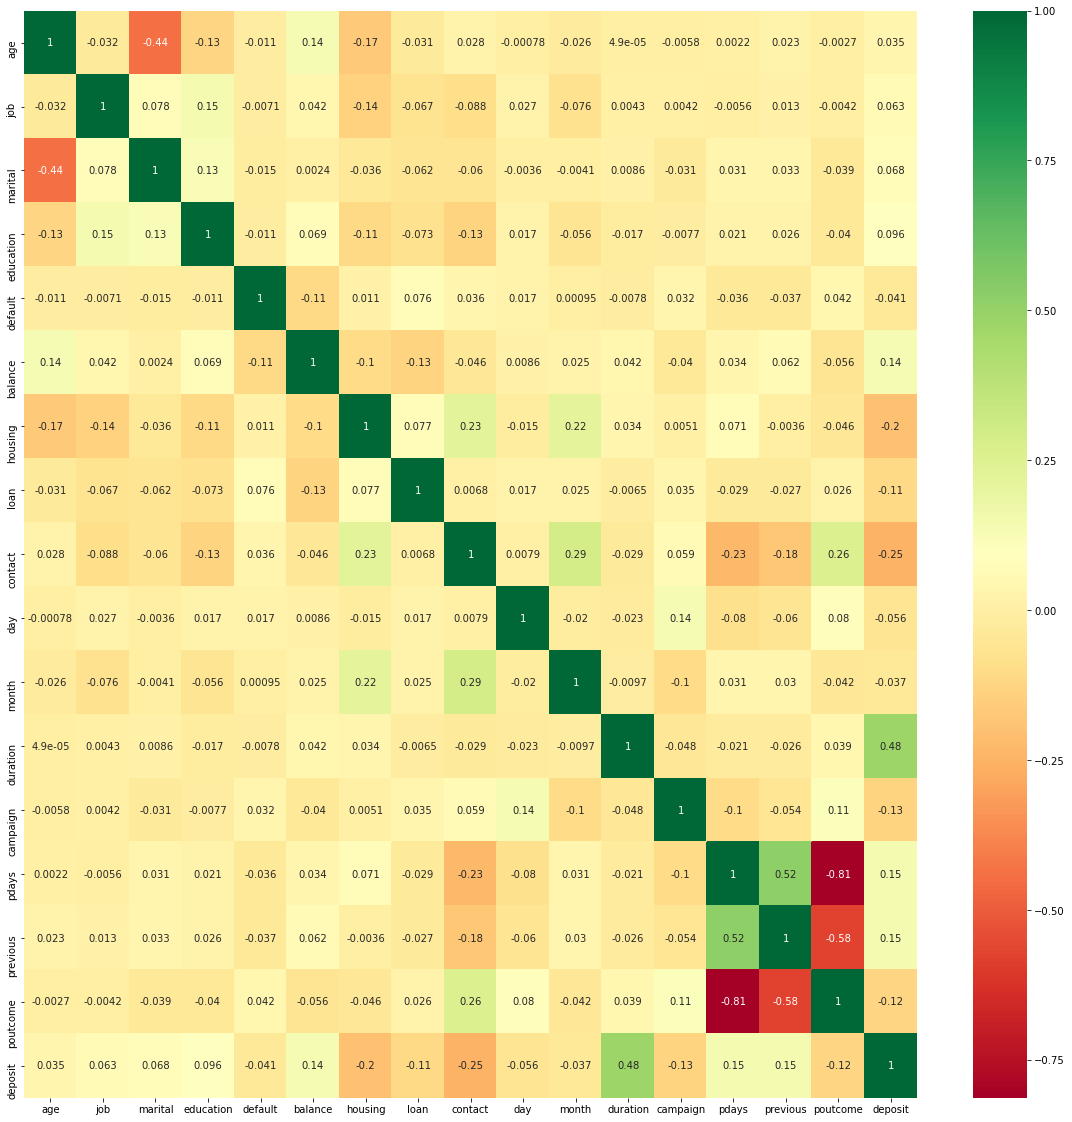

In [44]:
#get correlations of each features in dataset
corrmat = df_bank_feature_select.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_bank_feature_select[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## 3. What is the most effective way/ways to conduct marketing?

The most effective way/ways to conduct marketing should be contact with cellular because following reasons:
- Most of clients were communicated by cellular (8042 / 11162 ~ 72% total clients)
- 54% of clients who were communicated by cellular get a term deposit (this ratio for telephone is 50%)